In [2]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [4]:
cur=conn.cursor()

# Q1:Use pandas to display all the records in the student table.

In [5]:
sql_statement = """ select * from gp6.student"""

In [6]:
df=pandas.read_sql_query(sql_statement,conn)
df[:10]

,s_email,s_name,major
0,s1@dukes.jmu.edu,s1,IA
1,s2@dukes.jmu.edu,s2,CS
2,s3@dukes.jmu.edu,s3,IA
3,s4@dukes.jmu.edu,s4,IA
4,s5@dukes.jmu.edu,s5,IA
5,s6@dukes.jmu.edu,s6,IA
6,s7@dukes.jmu.edu,s7,CS
7,s8@dukes.jmu.edu,s8,CS
8,s9@dukes.jmu.edu,s9,CS
9,s10@dukes.jmu.edu,s10,IA


# Q2: Use pandas to display the teachers' names and the corresponding course names jointly. 

In [7]:
sql_statement2 = """ 
                select gp6.professor.p_name,
                gp6.course.c_name
                from gp6.professor
                inner join gp6.course
                on gp6.professor.p_email = gp6.course.p_email
                """

In [8]:
df=pandas.read_sql_query(sql_statement2,conn)
df[:10]

,p_name,c_name
0,Noel Hendrickson,INTRO TO IA
1,Orlandrew Danzell,COUNTERFACTUAL REASONING
2,Xuebin Wei,DATA MINING
3,John Robinson,ETHICS AND VIRTUE
4,new_p1,new_c_name
5,new_p1,Strategic Analysis
6,new_p1,IA SEMINAR
7,new_p1,CAPSTONE PREP


# Q3:  Use pandas to create a bar chart showing the number of enrolled students by each course number

In [15]:
sql_statement3 = """
                 select c_number,
                 count (s_email) as enroll
                 from gp6.enroll_list
                 group by c_number
                 order by enroll DESC
                 """

In [26]:
df_enroll = pandas.read_sql_query(sql_statement3, conn)

<AxesSubplot:xlabel='c_number'>

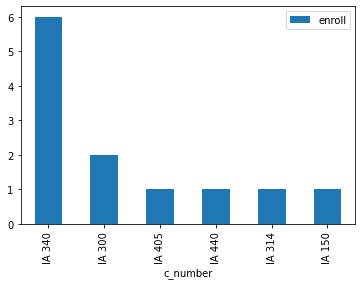

In [17]:
df_enroll.plot.bar (y='enroll', x='c_number')

# Q4: Use pandas to create a bar chart showing the number of courses taught by each professor name


In [18]:
sql_statement4 = """
                 select p_name,
                 count (c_name) as total_courses
                 from gp6.course
                 group by p_name
                 order by total_courses DESC
                 """

<AxesSubplot:xlabel='p_name'>

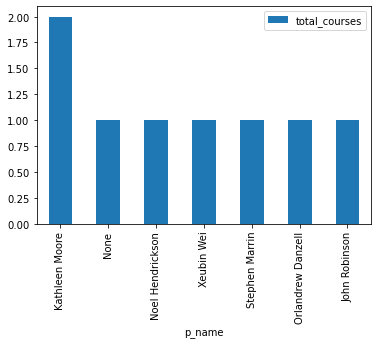

In [19]:
df_total_courses = pandas.read_sql_query(sql_statement4, conn)
df_total_courses.plot.bar (y='total_courses', x='p_name')

# Q5: A new professor just joined JMU and will teach a new course. Add a new record of the new professor in the teacher table, and the corresponding new course record in the course table. You can make up the professor's info and the new course info. Display the modified professor table and the course table.

In [20]:
sql_statement5 = """
                 insert into gp6.professor (p_email, p_name, office)
                 values ('new_p1', 'new_p1','new_o')
                 """
print(sql_statement5)


                 insert into gp6.professor (p_email, p_name, office)
                 values ('new_p1', 'new_p1','new_o')
                 


In [21]:
cur.execute(sql_statement5)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(new_p1) already exists.


In [22]:
conn.rollback()

In [23]:
conn.commit()

In [65]:
df = pandas.read_sql_query("select * from  gp6.professor", conn)
df[:]

,p_email,p_name,office,c_number
0,new_p_e,new_p_n,new_p_o,None
1,danzelox@jmu.edu,Orlandrew Danzell,005,IA 314
2,hendrinx@jmu.edu,Noel Hendrickson,004,IA 150
3,robinsja@jmu.edu,John Robinson,006,IA 405
4,waltontr@jmu.edu,Timothy Walton,001,IA 440
5,weixx@jmu.edu,Xuebin Wei,003,IA 340
6,marrinsp@jmu.edu,Stephen Marrin,007,IA 420
7,new_p1,new_p1,new_o,None


In [75]:
sql_statement6 = """
                 insert into gp6.course (c_number, c_name, room, p_email)
                 values ('ia_new' , 'new_c_name' , 'online', 'new_p1')
                 """
print(sql_statement6)


                 insert into gp6.course (c_number, c_name, room, p_email)
                 values ('ia_new' , 'new_c_name' , 'online', 'new_p1')
                 


In [76]:
cur.execute(sql_statement6)

In [68]:
conn.rollback()

In [77]:
conn.commit()

In [78]:
df = pandas.read_sql_query("select * from  gp6.course", conn)
df[:]

,c_number,c_name,room,p_email,p_name
0,IA 150,INTRO TO IA,101,hendrinx@jmu.edu,Noel Hendrickson
1,IA 314,COUNTERFACTUAL REASONING,103,danzelox@jmu.edu,Orlandrew Danzell
2,IA 340,DATA MINING,105,weixx@jmu.edu,Xeubin Wei
3,IA 405,ETHICS AND VIRTUE,100,robinsja@jmu.edu,John Robinson
4,IA 420,Strategic Analysis,110,marrinsp@jmu.edu,Stephen Marrin
5,IA 300,IA SEMINAR,102,marrinsp@jmu.edu,Kathleen Moore
6,IA 440,CAPSTONE PREP,104,marrinsp@jmu.edu,Kathleen Moore
7,ia_new,new_c_name,online,new_p1,None


# Q6: An existing professor will retire soon, and the newly hired professor will teach his/her courses. Delete one of the existing professors in the teacher table and change the instructor of his/her classes in the course table to the newly hired professor. Display the modified professor table and the course table.

In [79]:
sql_statement7 = """
                 update gp6.course
                 set p_email = 'new_p1'
                 where p_email = 'marrinsp@jmu.edu'
                 """

print(sql_statement7)


                 update gp6.course
                 set p_email = 'new_p1'
                 where p_email = 'marrinsp@jmu.edu'
                 


In [80]:
cur.execute(sql_statement7)

In [81]:
conn.commit()

In [82]:
df = pandas.read_sql_query("select * from  gp6.course", conn)
df[:]

,c_number,c_name,room,p_email,p_name
0,IA 150,INTRO TO IA,101,hendrinx@jmu.edu,Noel Hendrickson
1,IA 314,COUNTERFACTUAL REASONING,103,danzelox@jmu.edu,Orlandrew Danzell
2,IA 340,DATA MINING,105,weixx@jmu.edu,Xeubin Wei
3,IA 405,ETHICS AND VIRTUE,100,robinsja@jmu.edu,John Robinson
4,ia_new,new_c_name,online,new_p1,None
5,IA 420,Strategic Analysis,110,new_p1,Stephen Marrin
6,IA 300,IA SEMINAR,102,new_p1,Kathleen Moore
7,IA 440,CAPSTONE PREP,104,new_p1,Kathleen Moore


In [83]:
sql_statement8 = """
                 delete from gp6.professor
                 where p_email = 'marrinsp@jmu.edu'
                 """

print(sql_statement8)


                 delete from gp6.professor
                 where p_email = 'marrinsp@jmu.edu'
                 


In [84]:
cur.execute(sql_statement8)

In [85]:
df = pandas.read_sql_query("select * from  gp6.course", conn)
df[:]

,c_number,c_name,room,p_email,p_name
0,IA 150,INTRO TO IA,101,hendrinx@jmu.edu,Noel Hendrickson
1,IA 314,COUNTERFACTUAL REASONING,103,danzelox@jmu.edu,Orlandrew Danzell
2,IA 340,DATA MINING,105,weixx@jmu.edu,Xeubin Wei
3,IA 405,ETHICS AND VIRTUE,100,robinsja@jmu.edu,John Robinson
4,ia_new,new_c_name,online,new_p1,None
5,IA 420,Strategic Analysis,110,new_p1,Stephen Marrin
6,IA 300,IA SEMINAR,102,new_p1,Kathleen Moore
7,IA 440,CAPSTONE PREP,104,new_p1,Kathleen Moore


In [86]:
df = pandas.read_sql_query("select * from  gp6.professor", conn)
df[:]

,p_email,p_name,office,c_number
0,new_p_e,new_p_n,new_p_o,None
1,danzelox@jmu.edu,Orlandrew Danzell,005,IA 314
2,hendrinx@jmu.edu,Noel Hendrickson,004,IA 150
3,robinsja@jmu.edu,John Robinson,006,IA 405
4,waltontr@jmu.edu,Timothy Walton,001,IA 440
5,weixx@jmu.edu,Xuebin Wei,003,IA 340
6,new_p1,new_p1,new_o,None
